In [1]:
import matplotlib.pyplot as plt
import numpy as np
from random import randint
import time

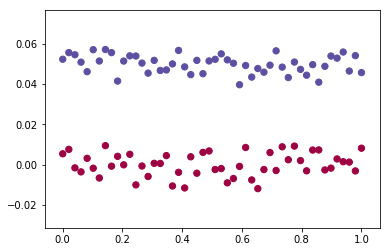

In [2]:
N = 50 # number of points per class
D = 2 # dimensionality
K = 2 # number of classes
X = np.zeros((N*K,D)) # data matrix (each row = single example)
y = np.zeros(N*K, dtype='uint8') # class labels
for j in range(K):
    ix = range(N*j,N*(j+1))
    r = np.linspace(0.0,1,N) # radius
    t = np.random.randn(N)*0.005
    X[ix] = np.c_[r, t+j*0.05]
    y[ix] = j
    
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.show()

In [3]:
def L_i_vectorized(x, y, W):
    """
    A faster half-vectorized implementation. half-vectorized
    refers to the fact that for a single example the implementation contains
    no for loops, but there is still one loop over the examples (outside this function)
    """
    delta = 0.01
    scores = W.dot(x)
    # compute the margins for all classes in one vector operation
    margins = np.maximum(0, scores - scores[y] + delta)
    # on y-th position scores[y] - scores[y] canceled and gave delta. We want
    # to ignore the y-th position and only consider margin on max wrong class
    margins[y] = 0
    loss_i = np.sum(margins)
    return loss_i

def L(X, y, W):
    """
    fully-vectorized implementation :
    - X holds all the training examples as columns (e.g. 3073 x 50,000 in CIFAR-10)
    - y is array of integers specifying correct class (e.g. 50,000-D array)
    - W are weights (e.g. 10 x 3073)
    """
    
    loss = np.zeros(X.shape)
    
    for i in range(len(loss)):
        loss_i = L_i_vectorized(X[i], y[i], W)
        loss[i] = loss_i
        
    return np.sum(loss)

def predict(X, y, W_final):
    num_test = X.shape[0]
    # lets make sure that the output type matches the input type
    Ypred = np.zeros(num_test)

    # loop over all test rows
    for i in range(num_test):
        scores = W_final.dot(X[i])
        max_index = np.argmax(scores)
        Ypred[i] = max_index

    print('accuracy: %f' % ( np.mean(Ypred == y) ))
    
def eval_numerical_gradient(f, x):
    """ 
    a naive implementation of numerical gradient of f at x 
    - f should be a function that takes a single argument
    - x is the point (numpy array) to evaluate the gradient at
    """ 

    fx = f(x) # evaluate function value at original point
    grad = np.zeros(x.shape)
    h = 0.000000001

    # iterate over all indexes in x
    it = np.nditer(x, flags=['multi_index'], op_flags=['readwrite'])
    while not it.finished:

        # evaluate function at x+h
        ix = it.multi_index
        old_value = x[ix]
        x[ix] = old_value + h # increment by h
        fxh = f(x) # evalute f(x + h)
        x[ix] = old_value # restore to previous value (very important!)

        # compute the partial derivative
        grad[ix] = (fxh - fx) / h # the slope
        it.iternext() # step to next dimension

    return grad

In [4]:
# W = 0.01 * np.random.randn(D,K)
# b = np.zeros((1,K))
# print(W.dot(X[1]))

# print(L(X,y,W))
# predict(X, y, W)

In [8]:
def loss_fun(W):    
    return L(X,y,W)

weights = 0.0001 * np.random.randn(D,K)
step_size = 10 ** -8
for i in range(10000): 
    df = eval_numerical_gradient(loss_fun, weights)     
    weights += - step_size * df

    if i % 500 == 0:
        print(time.strftime('%X'), i)
        #print('gradient', i)
        #print(weights)
        predict(X, y, weights)

11:57:24 0
accuracy: 0.430000
11:57:27 500
accuracy: 0.450000
11:57:30 1000
accuracy: 0.480000
11:57:33 1500
accuracy: 0.500000
11:57:36 2000
accuracy: 0.500000
11:57:39 2500
accuracy: 0.500000
11:57:43 3000
accuracy: 0.500000
11:57:46 3500
accuracy: 0.500000
11:57:49 4000
accuracy: 0.500000
11:57:52 4500
accuracy: 0.500000
11:57:55 5000
accuracy: 0.500000
11:57:58 5500
accuracy: 0.500000
11:58:01 6000
accuracy: 0.500000
11:58:04 6500
accuracy: 0.500000
11:58:07 7000
accuracy: 0.500000
11:58:11 7500
accuracy: 0.500000
11:58:14 8000
accuracy: 0.500000
11:58:17 8500
accuracy: 0.510000
11:58:20 9000
accuracy: 0.520000
11:58:23 9500
accuracy: 0.520000


In [6]:
predict(X, y, weights)

accuracy: 0.940000


In [7]:
print(weights)

[[ -2.70127559e-05  -5.32985622e-04]
 [ -4.91947497e-05   4.88041027e-04]]
